In [1]:
import sys
import os

# Add the 'src' directory to the Python path
src_dir = os.path.join(os.path.dirname(os.getcwd()), 'src')
sys.path.append(src_dir)

In [2]:
from NeuralNetwork import Neural_Network
from GD_class import GradientDescent
from cost_functions import Cost_Functions
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
cancer = load_breast_cancer()
X_orig = jnp.array(cancer.data)
target = jnp.array(cancer.target)


In [4]:
X_orig

Array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], dtype=float32)

In [5]:
X_orig.shape

(569, 30)

In [6]:
cost_function = Cost_Functions('LogReg', target)

n_hidden_layers = 1
n_hidden_nodes = 2
n_outputs = 1
learning_rate=0.1
n_inputs = X_orig.shape[1]

ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                      cost_function=cost_function,
                      learning_rate=learning_rate, activation_function_hidden='sigmoid',
                      activation_function_output='sigmoid',
                      optimizer=None,
                      classification_problem=True)


In [7]:
ffnn.train(X_orig, num_iter=100)

print('Weights and biases after training: \n')

print('Weights hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].weights}')
print('Biases hidden layer 1:\n'
      f'{ffnn.hidden_layers[0].biases}')

print('weights output layer:\n'
      f'{ffnn.output_layer.weights}')
print('Biases output layer:\n'
      f'{ffnn.output_layer.biases}')

print("\nFinal prediction after training:\n"
      f"{ffnn.output_layer.output}")

C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Weights and biases after training: 

Weights hidden layer 1:
[[ 1.0954685  -0.2056872 ]
 [-0.06312556 -0.3781293 ]
 [ 0.39462686 -0.34351978]
 [-0.543536   -1.0230972 ]
 [ 0.7536722  -0.54938805]
 [ 1.4760392   2.4636197 ]
 [-0.20886911  0.27806363]
 [ 1.2859343  -0.44410884]
 [ 0.621176   -1.6135898 ]
 [-0.27460173  1.0548136 ]
 [ 0.07030738  0.35753486]
 [-0.5156395   0.102832  ]
 [ 0.8478488  -0.04208334]
 [-1.211579    0.15259244]
 [-0.8616369  -0.60535514]
 [ 0.8239932   1.1378052 ]
 [-0.4026272   0.15472455]
 [-0.02204677  0.01509472]
 [ 1.2219552  -0.0638242 ]
 [ 0.83514345 -0.88763744]
 [-0.01510486  1.0077503 ]
 [-1.3141893  -1.3816043 ]
 [ 1.1615205  -0.4457664 ]
 [-0.3533324  -0.9172224 ]
 [-0.6587812  -0.6013405 ]
 [ 0.42089495 -1.2256036 ]
 [-0.9181255  -0.43141997]
 [-1.806716   -0.86267424]
 [ 0.6615034  -2.128494  ]
 [ 0.7300396   0.7127997 ]]
Biases hidden layer 1:
[[0.01 0.01]]
weights output layer:
[[0.03717294]
 [0.1404519 ]]
Biases output layer:
[[0.5230978]]

Fina

C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functions.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\vildesn\FYS_STK_4155\Projects\Project 2\src\activation_functi

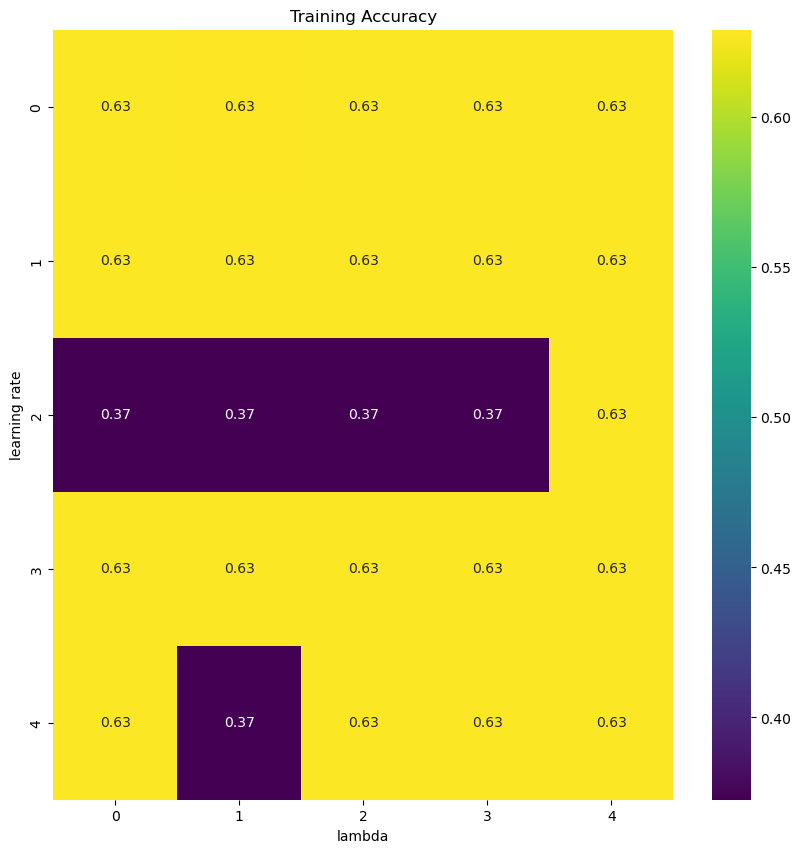

In [8]:
cost_function = Cost_Functions('LogReg', target)

learning_rates = np.logspace(-4, 0, 5)
lmbd_vals = np.logspace(-4, 0, 5)

accuracy = np.zeros((len(learning_rates), len(lmbd_vals)))

for i, lr in enumerate(learning_rates):
    for j, lmbd in enumerate(lmbd_vals):
        
        optimizer = GradientDescent(learning_rate=lr)
        
        ffnn = Neural_Network(n_inputs, n_hidden_layers, n_hidden_nodes, n_outputs, 
                              cost_function=cost_function,
                              learning_rate=lr, 
                              lmbd=lmbd, 
                              activation_function_hidden='sigmoid',
                              activation_function_output='sigmoid',
                              optimizer=optimizer,
                              classification_problem=True)
        
        ffnn.train(X_orig, num_iter=1000)
        pred = ffnn.output_layer.output
        #print(pred)

        accuracy[i][j] = accuracy_score(target, pred)
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("learning rate")
ax.set_xlabel("lambda")
plt.show()